# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.014803e+01     6.808604e+00
 * time: 0.06392717361450195
     1     2.697600e+01     4.473639e+00
 * time: 0.07338404655456543
     2     1.933704e+01     4.356362e+00
 * time: 0.09673404693603516
     3     1.750892e+01     4.692188e+00
 * time: 0.12006807327270508
     4     1.242597e+01     1.993293e+00
 * time: 0.14321517944335938
     5     1.116437e+01     7.697334e-01
 * time: 0.16612815856933594
     6     1.051502e+01     1.387801e+00
 * time: 0.18365001678466797
     7     9.886238e+00     8.338189e-01
 * time: 0.2000291347503662
     8     9.643608e+00     6.496891e-01
 * time: 0.21693110466003418
     9     9.508415e+00     5.550358e-01
 * time: 0.2341170310974121
    10     9.398173e+00     4.537501e-01
 * time: 0.25104808807373047
    11     9.232357e+00     6.100428e-01
 * time: 0.26752400398254395
    12     9.091839e+00     5.265529e-01
 * time: 0.28383803367614746
    13     8.989649e+00     9.770910e-01
 * time: 0

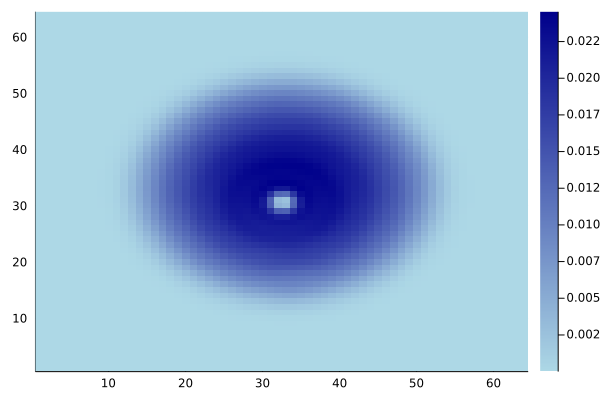

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)